# Importing essential libraries for data manipulation and analysis

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from collections import Counter

# Loading a dataset and displaying a sample of the data

In [2]:
df = pd.read_csv('data/Arabic_names.csv')
df.head(5)

,names,sex
0,ابتسام,F
1,ابتهاج,F
2,ابتهال,F
3,اجتهاد,F
4,ازدهار,F


# seeing the over all info of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8714 entries, 0 to 8713
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   names   8713 non-null   object
 1   sex     8714 non-null   object
dtypes: object(2)
memory usage: 136.3+ KB


# showing the class balnace of the dataset

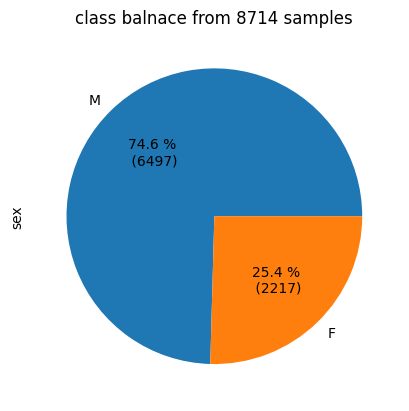

In [4]:
value_counts = df['sex'].value_counts()
total = value_counts.sum()
percentages = (value_counts / total) * 100

value_counts.plot.pie(autopct=lambda p: f'{p:.1f} %\n ({p * total / 100:.0f})')
plt.title(f'class balnace from {total} samples');

# Check Null Values

In [5]:
df.isnull().sum()

names    1
sex      0
dtype: int64

## drop NA recoerds

In [6]:
df.dropna(inplace=True)

## Check Null Values Again

In [7]:
df.isnull().sum()

names    0
sex      0
dtype: int64

# check all the letters & idenfiy unwated latters

In [8]:
arabic_alphabet = set('ايلمرنودبعسهىفحتجشزكقصطةخغضأءثئظذؤإآ')

dataset_alphabet = set(''.join(df['names']))

unwanted_chars = {char for char in dataset_alphabet if char not in arabic_alphabet}

print(f'The correct alphabet: {arabic_alphabet} Length: {len(arabic_alphabet)}')
print(f'The current dataset alphabet: {dataset_alphabet} Length: {len(dataset_alphabet)}')
print(f'The unwanted characters: {unwanted_chars} Length: {len(unwanted_chars)}')


The correct alphabet: {'ي', 'ء', 'ل', 'ف', 'ز', 'ص', 'د', 'ت', 'إ', 'ؤ', 'ع', 'ا', 'ه', 'و', 'ث', 'ر', 'ظ', 'خ', 'ش', 'ق', 'ب', 'ج', 'ى', 'ض', 'ك', 'ة', 'ط', 'أ', 'ح', 'آ', 'س', 'ن', 'ئ', 'م', 'ذ', 'غ'} Length: 36
The current dataset alphabet: {'\u200f', 'ي', 'ء', 'ل', 'ز', 'ف', 'ص', 'ّ', 'د', '\t', 'ت', 'إ', 'ؤ', '\r', 'ع', 'ا', 'ه', '-', 'و', '،', 'ث', 'ر', 'ظ', 'َ', '\n', 'ُ', 'خ', 'ش', ' ', 'ق', 'ب', 'ڤ', 'ج', 'ً', 'ى', 'ض', 'ك', 'ة', 'ط', 'ـ', 'أ', 'ح', 'آ', 'س', 'ن', 'ئ', '\\', '\xa0', 'چ', '.', 'م', 'ذ', 'غ', 'M'} Length: 54
The unwanted characters: {'\r', ' ', '\u200f', 'ڤ', '\n', 'ً', '-', '\\', '\xa0', 'ّ', '\t', '،', '.', 'چ', 'َ', 'ُ', 'M', 'ـ'} Length: 18


## idenfiy recoerd with unwanted charchters

In [9]:
def contains_unwanted_chars(text):
    return any(char in unwanted_chars for char in text)

df['contains_unwanted'] = df['names'].apply(contains_unwanted_chars)

records_with_unwanted_chars = df[df['contains_unwanted']]
records_with_unwanted_chars

,names,sex,contains_unwanted
52,أم كلثوم,F,True
562,أبو بكر,M,True
907,شمس الدين,M,True
930,صلاح الدين,M,True
1057,علاء الدين,M,True
1277,معين الدين,M,True
1322,ناصر الدين,M,True
1339,نجم الدين,M,True
1395,ولاء الدين,M,True
1594,فرّاخه,M,True


## remove the recoerd that contains unwanted letters

In [10]:
filtered_df = df[~df['contains_unwanted']]
filtered_df

,names,sex,contains_unwanted
0,ابتسام,F,False
1,ابتهاج,F,False
2,ابتهال,F,False
3,اجتهاد,F,False
4,ازدهار,F,False
...,...,...,...
8709,باسانت,F,False
8710,الرجال,M,False
8711,يحي,M,False
8712,حسانين,M,False


## check the diffrenece and how many samples did we drop

In [11]:
print(f"the amount of unwated recoerds {len(records_with_unwanted_chars)}")
print(f"the length of old df {len(df)}")
print(f"the length of fillterd df {len(filtered_df)}")

the amount of unwated recoerds 60
the length of old df 8713
the length of fillterd df 8653


# checking the frequncy of letters in the dataset

In [12]:
text_data = ''.join(filtered_df['names'].dropna()) 

letter_counts = Counter(text_data)

letter_counts = {char: count for char, count in letter_counts.items()}

## viuslztion the frequency

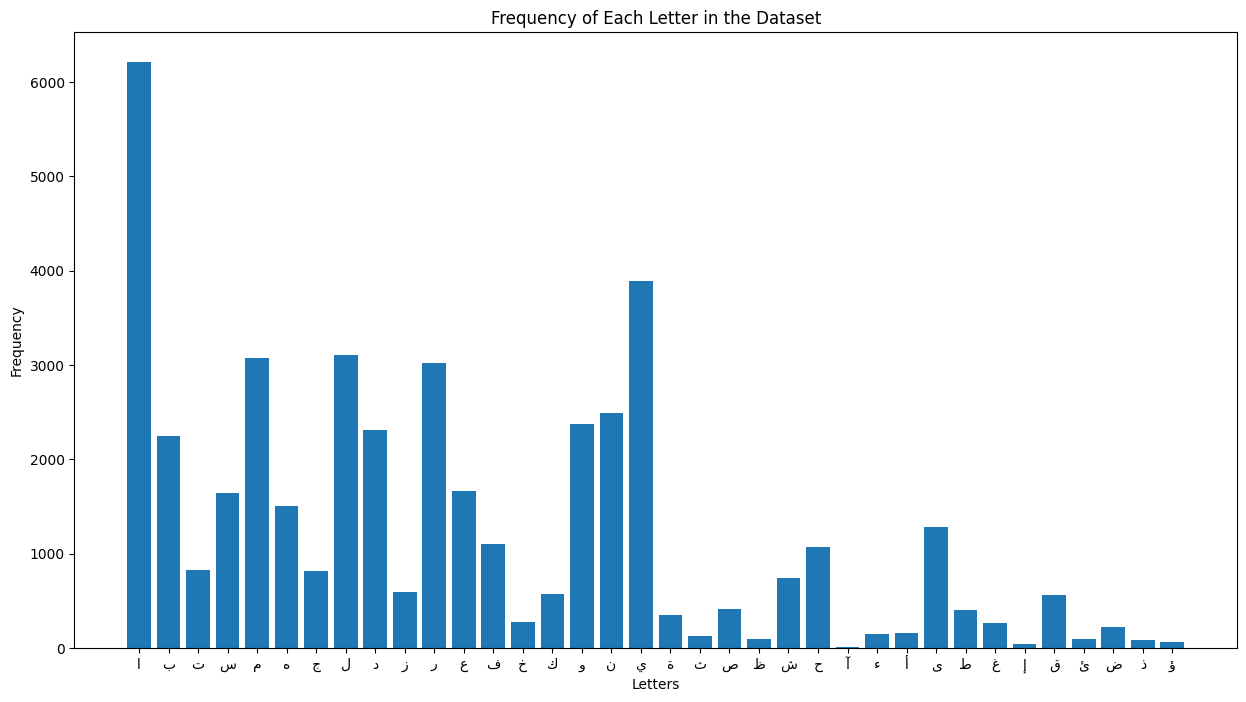

In [13]:
plt.figure(figsize=(15, 8))
plt.bar(letter_counts.keys(), letter_counts.values())
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Frequency of Each Letter in the Dataset')
plt.xticks(rotation=0);

# renameing the names column and droping contains_unwanted	

In [14]:
cleaned_filtered_df = filtered_df.copy()
cleaned_filtered_df = cleaned_filtered_df.rename(columns={'names': 'name'})
cleaned_filtered_df.drop('contains_unwanted', axis=1, inplace=True)
cleaned_filtered_df.head(5)

,name,sex
0,ابتسام,F
1,ابتهاج,F
2,ابتهال,F
3,اجتهاد,F
4,ازدهار,F


# saving the data

In [15]:
cleaned_filtered_df.to_pickle("data/dataset_after_cleaning.pkl")